# 6.1.3 DBSCAN

## Explanation of DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are close to each other based on a distance metric. It is particularly useful for identifying clusters of arbitrary shapes and for detecting noise and outliers in data. Unlike methods that require specifying the number of clusters, DBSCAN determines the number of clusters based on the density of points in the feature space.

### Key Concepts

- **Core Points**: Points that have at least a minimum number of other points within a given radius (epsilon). These points are part of a cluster.
- **Border Points**: Points that are within the epsilon radius of a core point but do not have enough neighbors to be a core point themselves.
- **Noise Points**: Points that are neither core points nor border points. These points do not belong to any cluster and are considered outliers.

### Parameters

- **Epsilon (ε)**: The maximum distance between two points for one to be considered as in the neighborhood of the other.
- **MinPts**: The minimum number of points required to form a dense region (a core point). 


### Algorithm

1. **Initialization**: Start with an unvisited point.
2. **Neighborhood Search**: Find all points within the epsilon radius of the current point.
3. **Core Point Check**: If the number of points within the radius is greater than or equal to MinPts, label the current point as a core point and create a new cluster.
4. **Cluster Expansion**: Add all points within the epsilon radius to the current cluster and repeat the process.
5. **Noise Handling**: If a point is not a core point and not within the epsilon radius of any core point, mark it as noise.


## Benefits and Use Cases of DBSCAN

- **No Need to Specify Number of Clusters**: DBSCAN does not require the number of clusters to be specified in advance.
- **Can Find Arbitrarily Shaped Clusters**: Suitable for datasets where clusters are not necessarily spherical.
- **Robust to Outliers**: Effectively identifies noise and outliers.
- **Good for Large Datasets**: Scales well with large datasets and can handle large volumes of data efficiently.

### Scenarios Where DBSCAN is Beneficial

1. **Spatial Data Analysis**: Useful for clustering spatial data where clusters can have irregular shapes.
2. **Anomaly Detection**: Effective in identifying outliers in datasets where noise is a concern.
3. **Large Datasets with Noise**: Suitable for large datasets where the number of clusters is unknown and noise is present.

## Methods for Implementing DBSCAN

To implement DBSCAN, you need to:
1. **Select the Epsilon (ε)**: Choose an appropriate value for the radius based on the dataset.
2. **Set the MinPts**: Determine the minimum number of points to form a dense region.
3. **Apply the Algorithm**: Use a DBSCAN implementation from a machine learning library to fit the model to the data and extract clusters.


___
___
### Readings:
- [DBSCAN(Density-Based Spatial Clustering of Applications with Noise) Clustering](https://towardsdev.com/machine-learning-algorithms-15-dbscan-density-based-spatial-clustering-of-applications-with-noise-8ef11761097c)
- [DBSCAN: Density-Based Clustering](https://readmedium.com/en/https:/ai.plainenglish.io/dbscan-density-based-clustering-aaebd76e2c8c)
- [Density Based Spatial Clustering of Applications with Noise (DBSCAN)](https://readmedium.com/en/https:/patriziacastagnod.medium.com/density-based-spatial-clustering-of-applications-with-noise-dbscan-4ca6c977ab97)
- [DBSCAN Clustering: Break It Down For Me](https://readmedium.com/en/https:/towardsdatascience.com/dbscan-clustering-break-it-down-for-me-859650a723af)
___
___

- ### Iris Dataset

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data

In [3]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X)

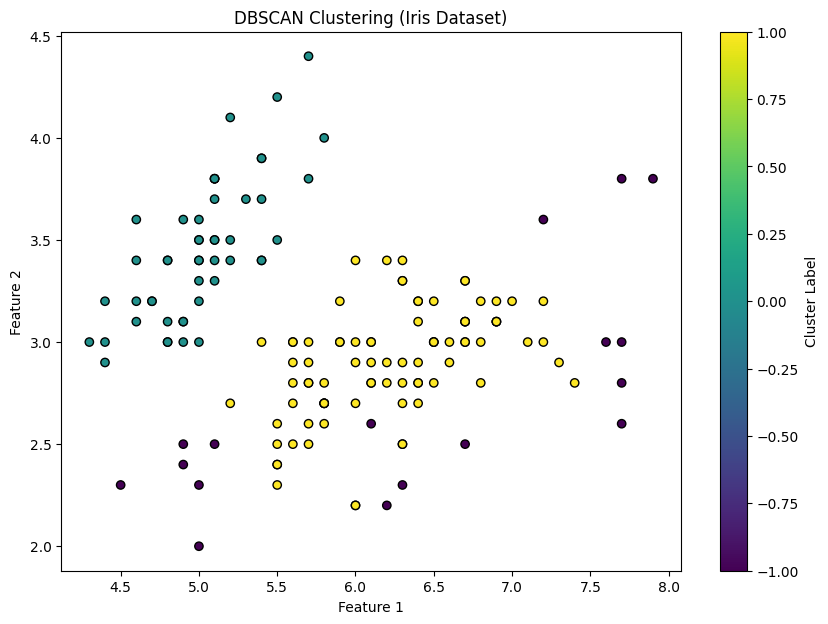

Number of clusters: 2
Number of noise points: 17


In [4]:
# Plot the clustering results
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title('DBSCAN Clustering (Iris Dataset)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Print the number of clusters and noise points
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

- ### Arbitrary-Shaped Datasets

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.cluster import DBSCAN

In [6]:
# Generate synthetic data with arbitrary shapes
X_moons, _ = make_moons(n_samples=200, noise=0.1, random_state=42)
X_circles, _ = make_circles(n_samples=300, noise=0.1, factor=0.3, random_state=42)

In [7]:
# Apply DBSCAN clustering on moon-shaped data
dbscan_moons = DBSCAN(eps=0.24, min_samples=4)
clusters_moons = dbscan_moons.fit_predict(X_moons)

# Apply DBSCAN clustering on circle-shaped data
dbscan_circles = DBSCAN(eps=0.2, min_samples=3)
clusters_circles = dbscan_circles.fit_predict(X_circles)

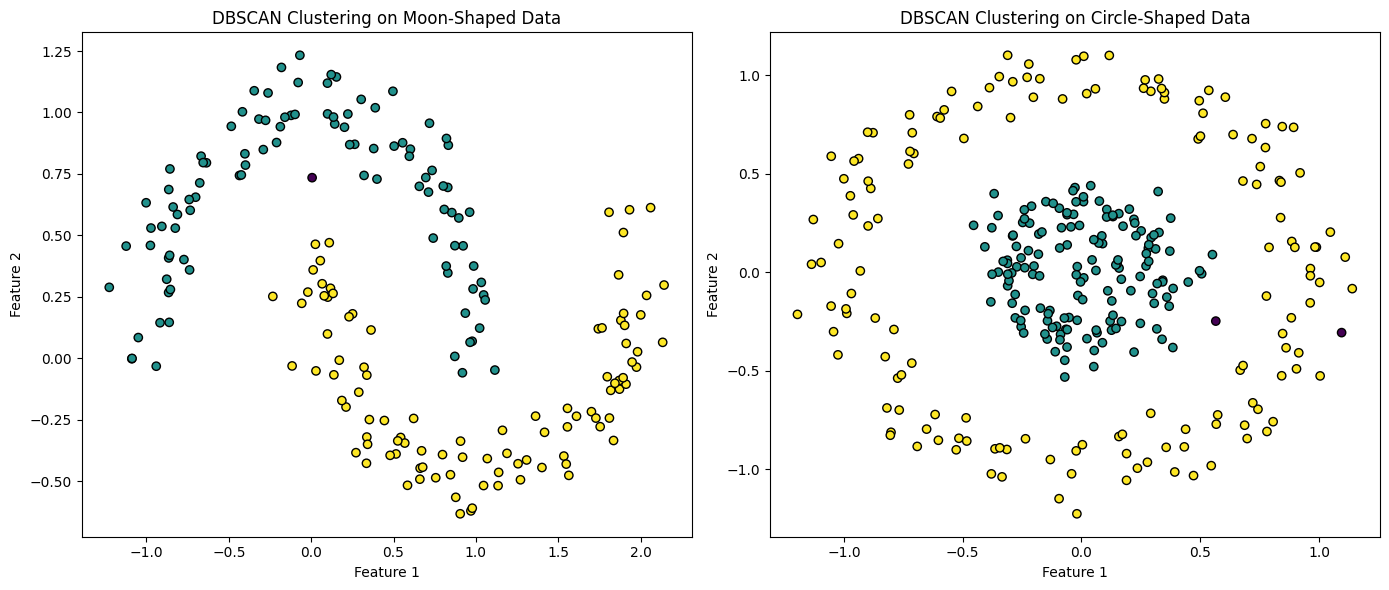

Moon-Shaped Data - Number of clusters: 2, Number of noise points: 1
Circle-Shaped Data - Number of clusters: 2, Number of noise points: 2


In [8]:
# Plotting results for moon-shaped data
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=clusters_moons, cmap='viridis', marker='o', edgecolor='k')
plt.title('DBSCAN Clustering on Moon-Shaped Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plotting results for circle-shaped data
plt.subplot(1, 2, 2)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=clusters_circles, cmap='viridis', marker='o', edgecolor='k')
plt.title('DBSCAN Clustering on Circle-Shaped Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Print the number of clusters and noise points
n_clusters_moons = len(set(clusters_moons)) - (1 if -1 in clusters_moons else 0)
n_noise_moons = list(clusters_moons).count(-1)
print(f'Moon-Shaped Data - Number of clusters: {n_clusters_moons}, Number of noise points: {n_noise_moons}')

n_clusters_circles = len(set(clusters_circles)) - (1 if -1 in clusters_circles else 0)
n_noise_circles = list(clusters_circles).count(-1)
print(f'Circle-Shaped Data - Number of clusters: {n_clusters_circles}, Number of noise points: {n_noise_circles}')

## Conclusion

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a powerful clustering technique that excels in identifying clusters with arbitrary shapes and handling noise. By examining the results of DBSCAN on different synthetic datasets, we can see its effectiveness in diverse clustering scenarios.

- #### Moon-Shaped Data
    In the moon-shaped dataset, DBSCAN successfully identified clusters corresponding to the crescent-like shapes in the data. The algorithm effectively distinguished between the core clusters and the noise points, demonstrating its capability to handle complex, non-convex cluster shapes. The number of identified clusters and noise points provides insight into how DBSCAN adapts to varying data densities and shapes.

- #### Circle-Shaped Data
    For the circle-shaped dataset, DBSCAN was able to detect clusters forming concentric circles, showcasing its flexibility in handling different cluster structures. The algorithm's ability to identify clusters within circular shapes and distinguish noise highlights its robustness in clustering tasks with irregular geometries.

Both examples illustrate DBSCAN's advantages in clustering datasets with complex patterns where traditional methods may struggle. The choice of parameters, especially epsilon (ε) and MinPts, is critical in tuning DBSCAN to achieve optimal clustering results. Proper parameter tuning ensures that clusters are correctly identified while minimizing the misclassification of noise.

Overall, DBSCAN's density-based approach is highly effective for identifying clusters of arbitrary shapes and is valuable for applications in spatial data analysis, anomaly detection, and any scenario where the number of clusters is not predetermined.
